In [12]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
#from qiskit.visualization import plot_bloch_multivector, plot_histogram
#import math

In [13]:
n=3
qr=QuantumRegister(n+1)
cr=ClassicalRegister(n)
ckt=QuantumCircuit(qr,cr)

In [14]:
ckt.h(range(n-1))
ckt.x(n)
ckt.h(n)
ckt.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q7'), 0), Qubit(QuantumRegister(4, 'q7'), 1), Qubit(QuantumRegister(4, 'q7'), 2), Qubit(QuantumRegister(4, 'q7'), 3)), clbits=())

In [15]:
# oracle is function dependent 
#e.g. oracle for f=x1 x2 x1'
# oracle x1,x2,y = x1,x2,y+f(x)= x1,x2,y+ x1 x2 x1'
ckt.ccx(0,1,2)
ckt.x(0)
ckt.ccx(2,0,3)
ckt.x(0)
ckt.ccx(0,1,2)

ckt.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q7'), 0), Qubit(QuantumRegister(4, 'q7'), 1), Qubit(QuantumRegister(4, 'q7'), 2), Qubit(QuantumRegister(4, 'q7'), 3)), clbits=())

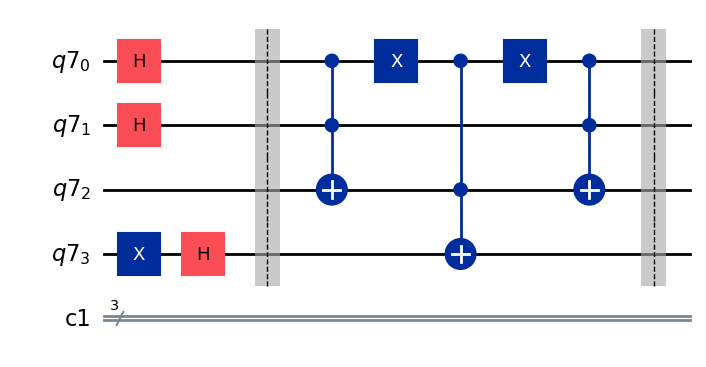

In [16]:
ckt.draw(output='mpl')

In [17]:
ckt.h(range(n-1))

In [18]:
ckt.measure(range(n-1),range(n-1))

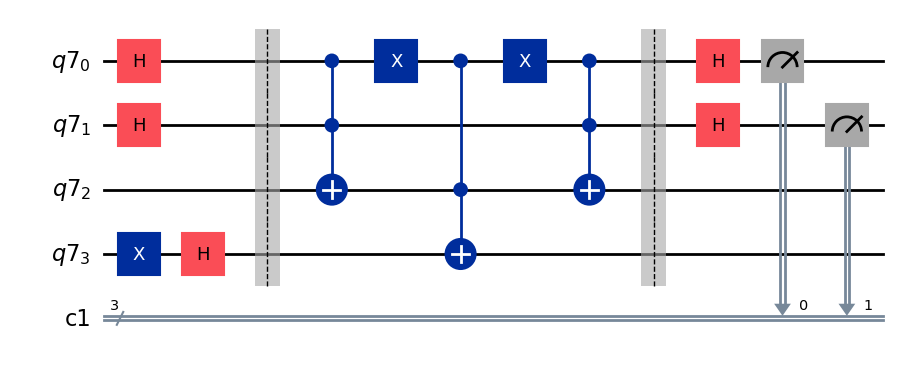

In [19]:
ckt.draw(output='mpl')

      ┌───┐      ░      ┌───┐     ┌───┐      ░ ┌───┐┌─┐   
q7_0: ┤ H ├──────░───■──┤ X ├──■──┤ X ├──■───░─┤ H ├┤M├───
      ├───┤      ░   │  └───┘  │  └───┘  │   ░ ├───┤└╥┘┌─┐
q7_1: ┤ H ├──────░───■─────────┼─────────■───░─┤ H ├─╫─┤M├
      └───┘      ░ ┌─┴─┐       │       ┌─┴─┐ ░ └───┘ ║ └╥┘
q7_2: ───────────░─┤ X ├───────■───────┤ X ├─░───────╫──╫─
      ┌───┐┌───┐ ░ └───┘     ┌─┴─┐     └───┘ ░       ║  ║ 
q7_3: ┤ X ├┤ H ├─░───────────┤ X ├───────────░───────╫──╫─
      └───┘└───┘ ░           └───┘           ░       ║  ║ 
c1: 3/═══════════════════════════════════════════════╩══╩═
                                                     0  1 
{'000': 1000}


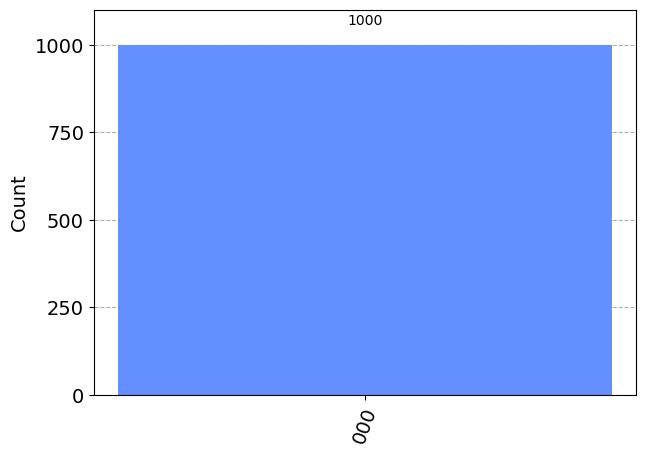

In [20]:
    print(ckt)
    
    #chosing backend and executing job
    backend = AerSimulator()
    
    # First we have to transpile the quantum circuit 
    # to the low-level QASM instructions used by the 
    # backend
    qc_compiled = transpile(ckt, backend)
    
    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend.run(qc_compiled, shots=1000)
    
    # Grab the results from the job.
    result_sim = job_sim.result()
    
    counts = result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)
    

In [21]:
IBMQ.load_account()

NameError: name 'IBMQ' is not defined

In [ ]:
provider=IBMQ.get_provider('ibm-q')


In [ ]:
avl_backends=provider.backends()
print(avl_backends)

In [ ]:
qcomp=provider.get_backend('ibmqx2')

In [ ]:
job=execute(ckt,backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result=job.result()

In [ ]:
plot_histogram(result.get_counts(ckt))